In [1]:
!pip install shapely

In [2]:
import SensorOptimizers.GeneticAlgorithm as ga
import numpy as np

In [3]:
results = []
for i in range(10):
    print('----- ', 'Running Genetic Algorithm #', i, ':')
    result = ga.run(print_epochs = False)
    results.append(result)
    
    print('\t', 'Best accuracy found:', max(result[len(result) - 1])[0], ' sensors num used:', max(result[len(result) - 1])[1])

-----  Running Genetic Algorithm # 0 :
----- Running GA for epsilon = 1


IntProgress(value=0)

	 Best accuracy found: 79.20286603759611  sensors num used: 11.0
-----  Running Genetic Algorithm # 1 :
----- Running GA for epsilon = 1


IntProgress(value=0)

KeyboardInterrupt: 

In [5]:
results[0]

[[(63.18580513079963, 15.0),
  (57.46996743411997, 14.0),
  (58.210299005884856, 15.0),
  (56.623788238513086, 14.0),
  (55.65469689985001, 15.0),
  (53.79637715842973, 14.0),
  (53.42965576407516, 14.0),
  (52.3367598451669, 15.0),
  (50.32950825038937, 14.0),
  (48.76493169758882, 14.0)],
 [(65.65073569903434, 14.0),
  (63.18580513079963, 15.0),
  (60.66321136916252, 15.0),
  (60.367132709173255, 15.0),
  (57.828586836843776, 14.0),
  (58.74710253099137, 15.0),
  (57.752896792461485, 15.0),
  (55.77546140755091, 14.0),
  (56.15391441003423, 15.0),
  (53.79637715842973, 14.0)],
 [(67.23982530515703, 14.0),
  (65.65073569903434, 14.0),
  (64.65789171295464, 15.0),
  (63.13450763563514, 15.0),
  (60.37102363138757, 15.0),
  (58.74710253099137, 15.0),
  (58.74685794728911, 15.0),
  (58.36165611744206, 15.0),
  (57.309250018576584, 15.0),
  (47.573082401333814, 14.0)],
 [(67.23982530515703, 14.0),
  (61.218982280034346, 14.0),
  (59.0680650778304, 14.0),
  (59.75023159596191, 15.0),
  (59

In [14]:
def my_plot_convergence(
            results,
            xlabel="Number of iterations $n$",
            ylabel=r"Min objective value after $n$ iterations",
            ax=None, name=None, alpha=0.2, yscale=None,
            color=None, true_minimum=None,
            **kwargs):
        
        losses = list(results)

        n_calls = len(losses)
        iterations = range(1, n_calls + 1)
        maxs = [np.max(losses[:i]) for i in iterations]
        min_maxs = min(maxs)
        cliped_losses = np.clip(losses, min_maxs, None)
        return plot_convergence(iterations, maxs, cliped_losses, xlabel, ylabel, ax, name, alpha, yscale, color,
                                true_minimum, **kwargs)
    
def plot_convergence(
        x, y1, y2,
        xlabel="Number of iterations $n$",
        ylabel=r"Min objective value after $n$ iterations",
        ax=None, name=None, alpha=0.2, yscale=None,
        color=None, true_minimum=None,
        **kwargs):
    import matplotlib.pyplot as plt
    
    if ax is None:
        ax = plt.gca()

    ax.set_title("Convergence plot")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid()

    if yscale is not None:
        ax.set_yscale(yscale)

    ax.plot(x, y1, c=color, label=name, **kwargs)
    ax.scatter(x, y2, c=color, alpha=alpha)

    if true_minimum is not None:
        ax.axhline(true_minimum, linestyle="--",
                   color="r", lw=1,
                   label="True minimum")

    if true_minimum is not None or name is not None:
        ax.legend(loc="upper right")
    return ax

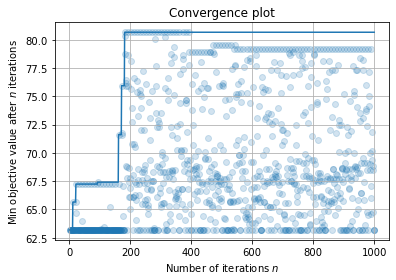

In [25]:
for run in results:
    acc = []
    for generation in run:
        for chromosome in generation:
            acc.append(chromosome[0])
            
    my_plot_convergence(acc)

In [ ]:

# SENSORS VISUALIZATION

'''
x = []
y = []
for i, g in enumerate(ga.chromosomes[0].grid):
    # print(g)
    if g == 1:
        x.append(ga.chromosomes[0].placeHolders[i][0])
        y.append(ga.chromosomes[0].placeHolders[i][1])

import matplotlib.pyplot as plt
plt.figure(figsize=(6.6, 10))
plt.scatter(y, x)
'''